In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [4]:
df.loc[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [5]:
df.loc[3116, 'gender'] = 'Male'

In [6]:
df1 = df.copy().drop(columns='id')

In [41]:
df1['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
cols = ['gender','ever_married', 'work_type','Residence_type','smoking_status']
for col in cols:
    print(df1[col].value_counts())
    print('_____________')

gender
Female    2994
Male      2116
Name: count, dtype: int64
_____________
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
_____________
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
_____________
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
_____________
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
_____________


In [10]:
X = df1.copy().drop(columns='stroke')
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [11]:
y=df1['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1914,Male,43.0,0,0,Yes,Private,Rural,77.86,28.9,never smoked
1751,Female,65.0,0,0,Yes,Private,Urban,88.82,28.2,formerly smoked
396,Male,60.0,1,0,Yes,Private,Rural,213.37,36.0,never smoked
1783,Male,2.0,0,0,No,children,Rural,65.67,16.6,Unknown
2361,Female,30.0,0,0,Yes,Private,Urban,101.98,23.2,Unknown
...,...,...,...,...,...,...,...,...,...,...
2895,Male,46.0,0,0,Yes,Private,Urban,137.77,29.3,never smoked
2763,Female,45.0,0,0,Yes,Private,Rural,63.73,32.0,Unknown
905,Female,31.0,0,0,Yes,Private,Rural,76.26,35.6,never smoked
3980,Female,45.0,0,0,Yes,Private,Rural,218.10,55.0,smokes


In [14]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4673,Female,42.00,0,0,Yes,Govt_job,Rural,112.98,37.2,formerly smoked
3232,Female,78.00,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked
3694,Male,28.00,0,0,No,Private,Urban,73.27,25.4,smokes
1070,Female,81.00,0,0,Yes,Self-employed,Rural,246.34,21.1,never smoked
4163,Female,52.00,0,0,Yes,Private,Rural,97.05,28.0,Unknown
...,...,...,...,...,...,...,...,...,...,...
2490,Male,0.88,0,0,No,children,Urban,85.38,23.4,Unknown
5078,Female,8.00,0,0,No,children,Urban,76.31,15.5,Unknown
4879,Male,3.00,0,0,No,children,Urban,81.88,18.0,Unknown
3125,Female,26.00,0,0,No,Govt_job,Urban,88.88,36.3,never smoked


In [15]:
y_train

1914    0
1751    0
396     0
1783    0
2361    0
       ..
2895    0
2763    0
905     0
3980    0
235     1
Name: stroke, Length: 3832, dtype: int64

In [16]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.set_output(transform="pandas")
X_train_encoded = ohe.fit_transform(X_train[cols])
X_train_encoded

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1914,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1751,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
396,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1783,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2361,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2763,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
905,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3980,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
X_train_encoded.columns.values

array(['gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [83]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3832 entries, 1914 to 235
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Female                   3832 non-null   float64
 1   gender_Male                     3832 non-null   float64
 2   ever_married_No                 3832 non-null   float64
 3   ever_married_Yes                3832 non-null   float64
 4   work_type_Govt_job              3832 non-null   float64
 5   work_type_Never_worked          3832 non-null   float64
 6   work_type_Private               3832 non-null   float64
 7   work_type_Self-employed         3832 non-null   float64
 8   work_type_children              3832 non-null   float64
 9   Residence_type_Rural            3832 non-null   float64
 10  Residence_type_Urban            3832 non-null   float64
 11  smoking_status_Unknown          3832 non-null   float64
 12  smoking_status_formerly smoked  3832 

In [18]:
X_test_encoded = ohe.fit_transform(X_test[cols])
X_test_encoded

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3232,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3694,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1070,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4163,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5078,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4879,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3125,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
scaler = StandardScaler().fit(X_train_encoded)
X_train_encoded_scaled = scaler.transform(X_train_encoded)
X_train_encoded_scaled

array([[-1.18236944,  1.18236944, -0.72155036, ..., -0.45906698,
         1.31578497, -0.42830663],
       [ 0.84575934, -0.84575934, -0.72155036, ...,  2.17833134,
        -0.7600026 , -0.42830663],
       [-1.18236944,  1.18236944, -0.72155036, ..., -0.45906698,
         1.31578497, -0.42830663],
       ...,
       [ 0.84575934, -0.84575934, -0.72155036, ..., -0.45906698,
         1.31578497, -0.42830663],
       [ 0.84575934, -0.84575934, -0.72155036, ..., -0.45906698,
        -0.7600026 ,  2.33477589],
       [ 0.84575934, -0.84575934, -0.72155036, ..., -0.45906698,
        -0.7600026 , -0.42830663]])

In [20]:
X_test['gender'].value_counts()

gender
Female    760
Male      518
Name: count, dtype: int64

In [21]:
X_test_encoded_scaled = scaler.transform(X_test_encoded)
X_test_encoded_scaled

array([[ 0.84575934, -0.84575934, -0.72155036, ...,  2.17833134,
        -0.7600026 , -0.42830663],
       [ 0.84575934, -0.84575934, -0.72155036, ...,  2.17833134,
        -0.7600026 , -0.42830663],
       [-1.18236944,  1.18236944,  1.38590465, ..., -0.45906698,
        -0.7600026 ,  2.33477589],
       ...,
       [-1.18236944,  1.18236944,  1.38590465, ..., -0.45906698,
        -0.7600026 , -0.42830663],
       [ 0.84575934, -0.84575934,  1.38590465, ..., -0.45906698,
         1.31578497, -0.42830663],
       [ 0.84575934, -0.84575934,  1.38590465, ..., -0.45906698,
        -0.7600026 , -0.42830663]])

In [22]:
lr = LogisticRegression(random_state = 1)

In [23]:
lr.fit(X_train_encoded_scaled, y_train)

LogisticRegression(random_state=1)

In [24]:
# Score the model
print(f"Training Data Score: {lr.score(X_train_encoded_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_encoded_scaled, y_test)}")

Training Data Score: 0.9545929018789144
Testing Data Score: 0.9413145539906104


In [66]:
# Generate predictions from the model we just fit
predictions = lr.predict(X_train_encoded_scaled)



In [63]:
y_test

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
2490    0
5078    0
4879    0
3125    0
4694    0
Name: stroke, Length: 1278, dtype: int64

In [64]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
1914,0,0
1751,0,0
396,0,0
1783,0,0
2361,0,0
...,...,...
2895,0,0
2763,0,0
905,0,0
3980,0,0


In [28]:
# Apply the fitted model to the `test` dataset
testing_predictions = lr.predict(X_test_encoded_scaled)

# Save both the test predictions and actual test values to a DataFrame
results_test_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [29]:
results_test_df

,Testing Data Predictions,Testing Data Actual Targets
4673,0,0
3232,0,0
3694,0,0
1070,0,0
4163,0,0
...,...,...
2490,0,0
5078,0,0
4879,0,0
3125,0,0


In [30]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

0.9413145539906104

In [31]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

In [32]:
rf_model = rf_model.fit(X_train_encoded_scaled, y_train)

In [33]:
# Score the model
print(f"Training Data Score: {rf_model.score(X_train_encoded_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_encoded_scaled, y_test)}")

Training Data Score: 0.9545929018789144
Testing Data Score: 0.9413145539906104


In [34]:
rf_testing_predictions = rf_model.predict(X_test_encoded_scaled)

In [35]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, rf_testing_predictions)

0.9413145539906104

In [36]:

print(balanced_accuracy_score(y_test, rf_testing_predictions))

0.5


In [37]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.10411500150779862, 'avg_glucose_level'),
 (0.08428144754146351, 'heart_disease'),
 (0.07634859334062334, 'hypertension'),
 (0.0744224295199389, 'ever_married'),
 (0.07156553995883025, 'Residence_type'),
 (0.07013148344491467, 'smoking_status'),
 (0.0687724888515085, 'age'),
 (0.06627638774966245, 'gender'),
 (0.04099909734799251, 'bmi'),
 (0.008212794268914206, 'work_type')]

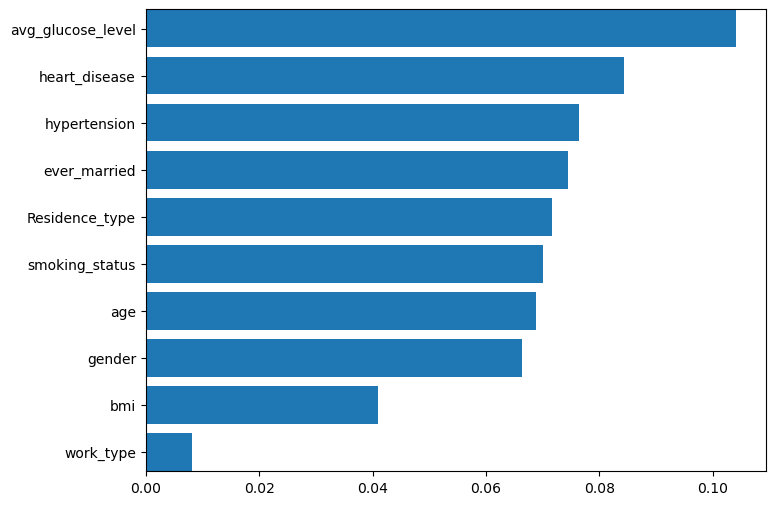

In [38]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [42]:
y_train.value_counts()

stroke
0    3658
1     174
Name: count, dtype: int64

Random Undersampling

In [39]:
# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = rus.fit_resample(X_train_encoded_scaled, y_train)

In [40]:
# Count distinct resampled values
y_resampled.value_counts()

stroke
0    174
1    174
Name: count, dtype: int64

In [43]:
# Instantiate a second RamdonForestClassifier instance
model_resampled = RandomForestClassifier()

# Fit the second model based the resampled data
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [44]:
# Make predictions using the initial model
#y_pred = model.predict(X_test_encoded_scaled)

# Make predictions using the model based on the resampled data
y_pred_resampled = model_resampled.predict(X_test_encoded_scaled)

In [47]:
# Print classification report
print(classification_report(y_test, rf_testing_predictions))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278

              precision    recall  f1-score   support

           0       0.96      0.41      0.58      1203
           1       0.07      0.73      0.13        75

    accuracy                           0.43      1278
   macro avg       0.52      0.57      0.35      1278
weighted avg       0.91      0.43      0.55      1278



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Oversampling

In [48]:
# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_over_resampled, y_over_resampled = random_oversampler.fit_resample(X_train_encoded_scaled, y_train)

In [49]:
# Count distinct values
y_over_resampled.value_counts()

stroke
0    3658
1    3658
Name: count, dtype: int64

In [50]:
# Create a RandomForestClassifier instance and fit it to the resampled data
model_over_resampled = RandomForestClassifier()
model_over_resampled.fit(X_over_resampled, y_over_resampled)

RandomForestClassifier()

In [51]:
# Make predictions for testing features
#y_pred = model.predict(X_test)
y_pred_over_resampled = model_over_resampled.predict(X_test_encoded_scaled)

In [52]:
# Print classification report
print(classification_report(y_test, rf_testing_predictions))
print(classification_report(y_test, y_pred_over_resampled))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1203
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.89      0.94      0.91      1278

              precision    recall  f1-score   support

           0       0.96      0.52      0.68      1203
           1       0.08      0.64      0.14        75

    accuracy                           0.53      1278
   macro avg       0.52      0.58      0.41      1278
weighted avg       0.91      0.53      0.64      1278



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Create a confusion matrix for logistic regression model
print(confusion_matrix(y_test, testing_predictions, labels = [0,1]))

[[1203    0]
 [  75    0]]


In [70]:
y_test.value_counts()

stroke
0    1203
1      75
Name: count, dtype: int64

In [79]:
# Create a confusion matrix for Random Forest classifier model
print(confusion_matrix(y_test, rf_testing_predictions, labels = [1,0]))

[[   0   75]
 [   0 1203]]


In [75]:
# Create a confusion matrix for Under Sampling Random Forest model
print(confusion_matrix(y_test, y_pred_resampled, labels = [1,0]))

[[ 55  20]
 [707 496]]


In [77]:
print(balanced_accuracy_score(y_test, y_pred_resampled))

0.5728179551122194


In [76]:
# Create a confusion matrix for Over Sampling Random Forest model
print(confusion_matrix(y_test, y_pred_over_resampled, labels = [1,0]))

[[ 48  27]
 [576 627]]


In [78]:
print(balanced_accuracy_score(y_test, y_pred_over_resampled))

0.5805985037406484


In [81]:
# Create a confusion matrix for Over Sampling Random Forest model
print(confusion_matrix(y_test, y_pred_over_resampled, labels = [1,0],normalize = 'all'))

[[0.03755869 0.02112676]
 [0.45070423 0.49061033]]
